# Fundamental Modules for Statistical Modelling

Feng Li

School of Statistics and Mathematics

Central University of Finance and Economics

[feng.li@cufe.edu.cn](mailto:feng.li@cufe.edu.cn)

[https://feng.li/python](https://feng.li/python)

## Install different version of Python modules 


- What if you want to install an application and leave it be? If an application works, any change in its libraries or the versions of those libraries can break the application. Also, what if you can’t install packages into the global site-packages directory, due to not having permissions to change the host python environment?

- Sometimes it is useful to have different versions of Python modules installed at different places. A quick solution is to install Python packages at current working directory.

In [19]:
! pip3 install pandas==1.2.1 -I -t .

Looking in indexes: https://mirrors.163.com/pypi/simple/
  Using cached https://mirrors.163.com/pypi/packages/c9/56/f415b4148622f469263ad2ece8bdf757972e94ffc97cb750dd8b79b04d43/pandas-1.2.1-cp39-cp39-manylinux1_x86_64.whl (9.7 MB)
  Using cached https://mirrors.163.com/pypi/packages/70/94/784178ca5dd892a98f113cdd923372024dc04b8d40abe77ca76b5fb90ca6/pytz-2021.1-py2.py3-none-any.whl (510 kB)
  Using cached https://mirrors.163.com/pypi/packages/7a/4c/dd00ce768b0f0f7de5c486cbd9f5b922bc3af2f3a5da30121d7f7dc03130/numpy-1.21.2-cp39-cp39-manylinux_2_12_x86_64.manylinux2010_x86_64.whl (15.8 MB)
  Using cached https://mirrors.163.com/pypi/packages/d4/70/d60450c3dd48ef87586924207ae8907090de0b306af2bce5d134d78615cb/python_dateutil-2.8.1-py2.py3-none-any.whl (227 kB)
  Using cached https://mirrors.163.com/pypi/packages/ee/ff/48bde5c0f013094d729fe4b0316ba2a24774b3ff1c52d924a8a4cb04078a/six-1.15.0-py2.py3-none-any.whl (10 kB)


In [21]:
import pandas
pandas.__version__

'1.2.1'

- In all these cases, [`virtualenv`](https://virtualenv.pypa.io/en/latest/) can also help you. It creates an environment that has its own installation directories, that doesn’t share libraries with other virtualenv environments (and optionally doesn’t access the globally installed libraries either).

# Python modules for Statistics

## NumPy

`NumPy` is short for Numerical Python, is the foundational package for scientific computing in Python. It contains among other things:

- a powerful N-dimensional array object
- sophisticated (broadcasting) functions
- tools for integrating C/C++ and Fortran code
- useful linear algebra, Fourier transform, and random number capabilities

Besides its obvious scientific uses, NumPy can also be used as an efficient multi-dimensional container of generic data. Arbitrary data-types can be defined. This allows NumPy to seamlessly and speedily integrate with a wide variety of databases. 

- [NumPy Reference](https://numpy.org/doc/stable/reference/)
- [NumPy User Guide](https://numpy.org/doc/stable/user/index.html)


## SciPy 

`SciPy` is a collection of packages addressing a number of different standard problem domains in scientific computing. Here is a sampling of the packages included:

- `scipy.integrate` : numerical integration routines and differential equation solvers.
- `scipy.linalg` : linear algebra routines and matrix decompositions extending beyond those provided in `numpy.linalg`.
- `scipy.optimize` : function optimizers (minimizers) and root finding algorithms.

- `scipy.signal` : signal processing tools.
- `scipy.sparse` : sparse matrices and sparse linear system solvers.
- `scipy.special` : wrapper around SPECFUN, a Fortran library implementing many common mathematical functions, such as the gamma function.
- `scipy.stats` : standard continuous and discrete probability distributions (density functions, samplers, continuous distribution functions), various statistical tests, and more descriptive statistics.
- ... 

[SciPy Reference Guide](https://docs.scipy.org/doc/scipy/)

# Linear Algebra

Linear algebra can be done conveniently via `scipy.linalg`. When SciPy is built using the optimized ATLAS LAPACK and BLAS libraries, it has very fast linear algebra capabilities. If you dig deep enough, all of the raw lapack and blas libraries are available for your use for even more speed. In this section, some easier-to-use interfaces to these routines are described.

All of these linear algebra routines expect an object that can be converted into a 2-dimensional array. The output of these routines is also a two-dimensional array.

## Matrices and n-dimensional array

In [22]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [23]:
linalg.inv(A) # inverse of a matrix

array([[-2. ,  1. ],
       [ 1.5, -0.5]])

In [24]:
b = np.array([[5,6]]) #2D array
b

array([[5, 6]])

In [25]:
b.T

array([[5],
       [6]])

In [26]:
A*b #not matrix multiplication!

array([[ 5, 12],
       [15, 24]])

In [27]:
A.dot(b.T) #matrix multiplication

array([[17],
       [39]])

In [28]:
b = np.array([5,6]) #1D array
b

array([5, 6])

In [29]:
b.T  #not matrix transpose!

array([5, 6])

In [30]:
A.dot(b)  #does not matter for multiplication

array([17, 39])

- Numpy array can easily convet to Pandas, and vise versa.

In [58]:
import pandas as pd
Ap = pd.DataFrame(A)
Ap

,0,1,2
0,1,2,3
1,4,5,6


In [60]:
A2 = Ap.values
A2

array([[1, 2, 3],
       [4, 5, 6]])

In [61]:
type(A2)

numpy.ndarray

## Solving linear system¶

In [15]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
A

array([[1, 2],
       [3, 4]])

In [32]:
b = np.array([[5],[6]])
b

array([[5],
       [6]])

In [31]:
linalg.inv(A).dot(b) #slow

array([-4. ,  4.5])

In [33]:
A.dot(linalg.inv(A).dot(b))-b #check

array([[0.],
       [0.]])

In [34]:
np.linalg.solve(A,b) #fast

array([[-4. ],
       [ 4.5]])

In [35]:
A.dot(np.linalg.solve(A,b))-b #check

array([[0.],
       [0.]])

## Determinant

In [36]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
linalg.det(A)

-2.0

## Least-squares problems and pseudo-inverses

In [37]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

In [38]:
c1, c2 = 5.0, 2.0
i = np.r_[1:11]
xi = 0.1*i
yi = c1*np.exp(-xi) + c2*xi
zi = yi + 0.05 * np.max(yi) * np.random.randn(len(yi))

In [39]:
A = np.c_[np.exp(-xi)[:, np.newaxis], xi[:, np.newaxis]]
c, resid, rank, sigma = linalg.lstsq(A, zi)

In [40]:
xi2 = np.r_[0.1:1.0:100j]
yi2 = c[0]*np.exp(-xi2) + c[1]*xi2

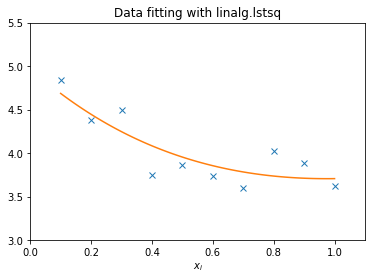

In [42]:
plt.plot(xi,zi,'x',xi2,yi2)
plt.axis([0,1.1,3.0,5.5])
plt.xlabel('$x_i$') # LaTeX symbols are also supported
plt.title('Data fitting with linalg.lstsq')
plt.show()

## Eigenvalues and eigenvectors

In [43]:
import numpy as np
from scipy import linalg
A = np.array([[1,2],[3,4]])
la,v = linalg.eig(A)
l1,l2 = la
print(l1, l2)  #eigenvalues

print(v[:,0])  #first eigenvector

print(v[:,1])  #second eigenvector

print(np.sum(abs(v**2),axis=0)) #eigenvectors are unitary

v1 = np.array(v[:,0]).T
print(linalg.norm(A.dot(v1)-l1*v1)) #check the computation

(-0.3722813232690143+0j) (5.372281323269014+0j)
[-0.82456484  0.56576746]
[-0.41597356 -0.90937671]
[1. 1.]
5.551115123125783e-17


## Singular Value Decomposition (SVD)

In [44]:
import numpy as np
from scipy import linalg
A = np.array([[1,2,3],[4,5,6]])

In [45]:
M,N = A.shape
U,s,Vh = linalg.svd(A)
Sig = linalg.diagsvd(s,M,N)

In [46]:
U, Vh = U, Vh
U

array([[-0.3863177 ,  0.92236578],
       [-0.92236578, -0.3863177 ]])

In [47]:
Sig

array([[9.508032  , 0.        , 0.        ],
       [0.        , 0.77286964, 0.        ]])

In [48]:
Vh

array([[-0.42866713, -0.56630692, -0.7039467 ],
       [-0.80596391, -0.11238241,  0.58119908],
       [ 0.40824829, -0.81649658,  0.40824829]])

In [49]:
U.dot(Sig.dot(Vh)) #check computation

array([[1., 2., 3.],
       [4., 5., 6.]])

## QR decomposition

The command for QR decomposition is `linalg.qr`.

## LU decomposition
    
The SciPy command for this decomposition is `linalg.lu`.  If the intent for performing LU decomposition is for solving linear systems then the command `linalg.lu_factor` should be used followed by repeated applications of the command `linalg.lu_solve` to solve the system for each new right-hand-side.

## Cholesky decomposition

The command `linalg.cholesky` computes the cholesky factorization. For using Cholesky factorization to solve systems of equations there are also `linalg.cho_factor` and `linalg.cho_solve` routines that work similarly to their LU decomposition counterparts.

# Statistical Distributions

A large number of probability distributions as well as a growing library of statistical functions are available in `scipy.stats`. See http://docs.scipy.org/doc/scipy/reference/stats.html for a complete list.

- Generate random numbers from normal distribution:

In [34]:
from scipy.stats import norm
r = norm.rvs(loc=0, scale=1, size=1000)

- Calculate a few first moments:

In [35]:
mean, var, skew, kurt = norm.stats(moments='mvsk')

# Linear regression model

This example computes a least-squares regression for two sets of measurements.

In [50]:
from scipy import stats
import numpy as np
x = np.random.random(10)
y = np.random.random(10)
slope, intercept, r_value, p_value, std_err = stats.linregress(x,y)
print({'slope':slope,'intercept':intercept})
print({'p_value':p_value,'r-squared':round(r_value**2,2)})

{'slope': 0.0016389519609387667, 'intercept': 0.5367248508312181}
{'p_value': 0.9950296225204127, 'r-squared': 0.0}


## Optimization

The `minimize` function provides a common interface to unconstrained and constrained minimization algorithms for multivariate scalar functions in `scipy.optimize`

In [52]:
import numpy as np
from scipy.optimize import minimize

def rosen(x):
    """The Rosenbrock function"""
    return sum(100.0*(x[1:]-x[:-1]**2.0)**2.0 + (1-x[:-1])**2.0)

In [64]:
x0 = np.array([1.3, 0.7, 0.8, 1.9, 1.2])

## Calling the minimize() function
res = minimize(rosen, x0, method='nelder-mead',
               options={'xtol': 1e-8, 'disp': True})
print(res.x)

Optimization terminated successfully.
         Current function value: 0.000000
         Iterations: 339
         Function evaluations: 571
[1. 1. 1. 1. 1.]
